<h1> Exercise 6.5

In [109]:
data <- read.csv("./data/TrainExer65.csv")
names(data[[] 1 - "YERA

n <- nrow(data)

data$T <- data$YEAR - 1960

data$GIP_l1 <- c(c(rep(NA, 1)), data$GIP[-((n-0):n)])
data$GIP_l2 <- c(c(rep(NA, 2)), data$GIP[-((n-1):n)])
data$GCLI_l1 <- c(c(rep(NA, 1)), data$GCLI[-((n-0):n)])
data$GCLI_l2 <- c(c(rep(NA, 2)), data$GCLI[-((n-1):n)])

data$LOGIP_l1 <- c(c(rep(NA, 1)), data$LOGIP[-((n-0):n)])
data$LOGIP_l2 <- c(c(rep(NA, 2)), data$LOGIP[-((n-1):n)])
data$LOGCLI_l1 <- c(c(rep(NA, 1)), data$LOGCLI[-((n-0):n)])
data$LOGCLI_l2 <- c(c(rep(NA, 2)), data$LOGCLI[-((n-1):n)])

"
train <- data[data$YEAR <= 2002,]
test <- data(data$YEAR>= 200),]"

In [17]:
summary(data)

      YEAR          LOGIP           LOGCLI           GIP          
 Min.   :1960   Min.   :3.207   Min.   :3.437   Min.   :-0.08781  
 1st Qu.:1972   1st Qu.:3.831   1st Qu.:3.784   1st Qu.: 0.01024  
 Median :1984   Median :4.088   Median :3.961   Median : 0.03364  
 Mean   :1984   Mean   :4.101   Mean   :4.045   Mean   : 0.03024  
 3rd Qu.:1995   3rd Qu.:4.417   3rd Qu.:4.309   3rd Qu.: 0.05952  
 Max.   :2007   Max.   :4.722   Max.   :4.648   Max.   : 0.11804  
                                                                  
      GCLI                T             GIP_l1             GIP_l2         
 Min.   :-0.15773   Min.   : 0.00   Min.   :-0.08781   Min.   :-0.087810  
 1st Qu.:-0.01309   1st Qu.:11.75   1st Qu.: 0.00998   1st Qu.: 0.009718  
 Median : 0.03483   Median :23.50   Median : 0.03399   Median : 0.034003  
 Mean   : 0.02454   Mean   :23.50   Mean   : 0.03045   Mean   : 0.030833  
 3rd Qu.: 0.05290   3rd Qu.:35.25   3rd Qu.: 0.06082   3rd Qu.: 0.062116  
 Max.   : 0.11

<h3> Part (a)<h3> 

Graph of growth are rather stationary.

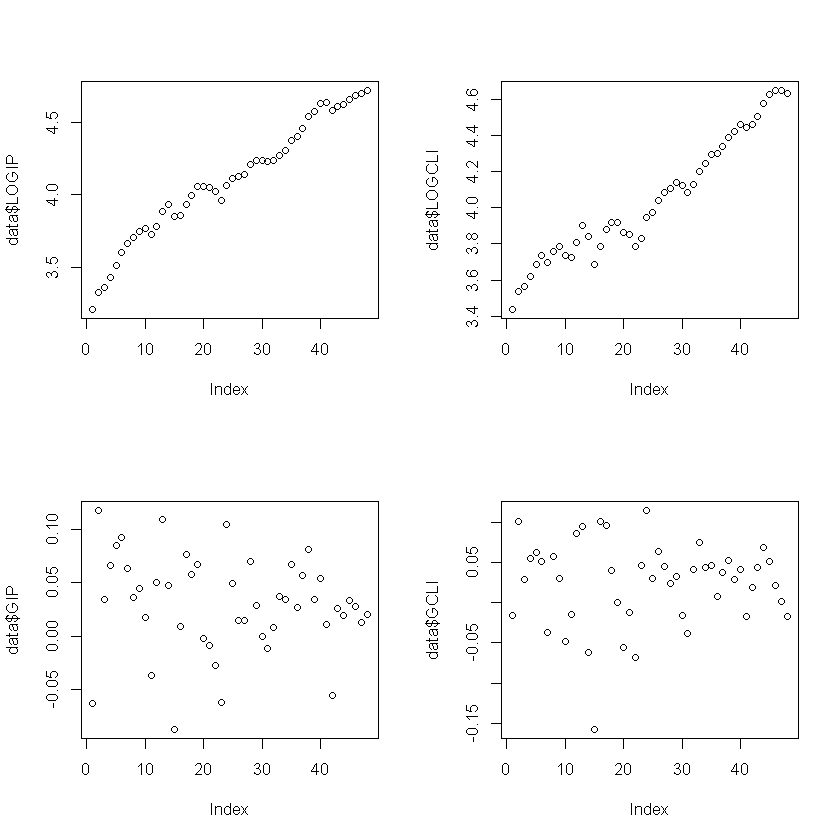

In [20]:
attach(mtcars)
par(mfrow=c(2,2))
plot(data$LOGIP)
plot(data$LOGCLI)
plot(data$GIP)
plot(data$GCLI)

<h3> Part (b)</h3>

In [90]:
LOGIP_ADF <- lm(GIP ~ T + LOGIP_l1 + GIP_l1 + GIP_l2, data=train)
sprintf("LOGIP:")
sprintf("Coefficient = %.5f", summary(LOGIP_ADF)$coefficient[3, "Estimate"])
sprintf("Std. Error = %.5f", summary(LOGIP_ADF)$coefficient[3, "Std. Error"])
sprintf("t-value = %.5f > -3.5. Do not reject H0. LOGIP is non stationary.", summary(LOGIP_ADF)$coefficient[3, "t value"])
# summary(LOGIP_ADF)

[1] "LOGIP:"

[1] "Coefficient = -0.27521"

[1] "Std. Error = 0.10169"

[1] "t-value = -2.70638 > -3.5. Do not reject H0. LOGIP is non stationary."

In [92]:
LOGCLI <- lm(GCLI ~ T + LOGCLI_l1 + GCLI_l1 + GCLI_l2, data=train)
sprintf("LOGCLI:")
sprintf("Coefficient = %.5f", summary(LOGCLI)$coefficient[3, "Estimate"])
sprintf("Std. Error = %.5f", summary(LOGCLI)$coefficient[3, "Std. Error"])
sprintf("t-value = %.5f > -3.5. Do not reject H0. LOGCLI is non stationary.", summary(LOGCLI)$coefficient[3, "t value"])
# summary(LOGCLI)

[1] "LOGCLI:"

[1] "Coefficient = -0.24051"

[1] "Std. Error = 0.12759"

[1] "t-value = -1.88504 > -3.5. Do not reject H0. LOGCLI is non stationary."

<h3> Part (c) </h3>

In [27]:
eg <- lm(LOGIP ~ LOGCLI, data=train)
sprintf("Formula: LOGIP = %.2f + %.2fLOGCLI", coef(eg)[1], coef(eg)[2])

[1] "Formula: LOGIP = -1.02 + 1.27LOGCLI"

In [33]:
res_data <- train
res_data$e <- summary(eg)$residuals
res_data$De <- c(NA, diff(res_data$e, lag=1))

n <- nrow(res_data)
res_data$e_l1 <- c(c(rep(NA, 1)), res_data$e[-((n-0):n)])
res_data$De_l1 <- c(c(rep(NA, 1)), res_data$De[-((n-0):n)])
res_data$De_l2 <- c(c(rep(NA, 2)), res_data$De[-((n-1):n)])

In [95]:
res_fit <- lm(De ~ T + e_l1 + De_l1 + De_l2, data=res_data)
sprintf("Formula: De = %.2f - %.2fT - %.2fe_l1 + %.2fDe_l1 - %.2fDe_l2", coef(res_fit)[1], -1*coef(res_fit)[2], -1*coef(res_fit)[3], coef(res_fit)[4], -1*coef(res_fit)[5])
sprintf("t-value = %.5f > -3.8. Reject H0. LOGIP and LOGCLI are not cointegrated.", summary(res_fit)$coefficient[3, "t value"])

[1] "Formula: De = 0.02 - 0.00T - 0.18e_l1 + 0.14De_l1 - 0.32De_l2"

[1] "t-value = -1.75742 > -3.8. Reject H0. LOGIP and LOGCLI are not cointegrated."

<h3> Part (d)</h3>

CLI is a Granger causal for IP, but not the other way around

In [37]:
fit0 <- lm(GIP ~ GIP_l1 + GIP_l2, data=train)
fit1 <- lm(GIP ~ GIP_l1 + GIP_l2 + GCLI_l1 + GCLI_l2, data=train)

rsq_0 <- as.numeric(summary(fit0)$r.squared)
rsq_1 <- as.numeric(summary(fit1)$r.squared)
n <- nrow(na.omit(train))
g <- 2 #no. of excluded variables
k <- 5 #total number of variables in unrestricted model
F <- (rsq_1 - rsq_0) * (n - k) / (1 - rsq_1) / g
sprintf("F = %.3f > 3.3, therefore reject H0 at 5%% level", F)

[1] "F = 11.747 > 3.3, therefore reject H0 at 5% level"

In [96]:
fit0 <- lm(GCLI ~ GCLI_l1 + GCLI_l2, data=train)
fit1 <- lm(GCLI ~ GIP_l1 + GIP_l2 + GCLI_l1 + GCLI_l2, data=train)

rsq_0 <- as.numeric(summary(fit0)$r.squared)
rsq_1 <- as.numeric(summary(fit1)$r.squared)
n <- nrow(na.omit(train))
g <- 2 #no. of excluded variables
k <- 5 #total number of variables in unrestricted model
F <- (rsq_1 - rsq_0) * (n - k) / (1 - rsq_1) / g
sprintf("F = %.3f < 3.3, therefore do not reject H0 at 5%% level", F)

[1] "F = 2.670 < 3.3, therefore do not reject H0 at 5% level"

<h3> Part (e) </h3>

In [43]:
GIP_AR1 <- lm(GIP ~ GIP_l1 + GIP_l2, data=train)
print(summary(GIP_AR1)$coefficients[(2:3),])

         Estimate Std. Error   t value  Pr(>|t|)
GIP_l1  0.2471812  0.1471256  1.680069 0.1011481
GIP_l2 -0.2352772  0.1459270 -1.612294 0.1151737


In [44]:
GIP_AR2 <- lm(GIP ~ GIP_l1, data=train)
print(summary(GIP_AR2)$coefficients[2,])

  Estimate Std. Error    t value   Pr(>|t|) 
 0.1122896  0.1492782  0.7522168  0.4563246 


In [98]:
GIP_simple <- lm(GIP ~ 1, data=train)
print(summary(GIP_simple)$coefficients[1,])

    Estimate   Std. Error      t value     Pr(>|t|) 
0.0311177907 0.0072671014 4.2820085864 0.0001052546 


In [115]:
result <- test[,c("YEAR","GIP")]

In [116]:
result$GIP_AR1 <- predict(GIP_AR1, newdata=test)
result$GIP_simple <- predict(GIP_simple, newdata=test)

<h3> Part (f) </h3>

In [134]:
fit0 <- lm(GIP ~ GCLI_l1, data=train)
fit1 <- lm(GIP ~ GIP_l1 + GIP_l2 + GCLI_l1 + GCLI_l2, data=train)

rsq_0 <- as.numeric(summary(fit0)$r.squared)
rsq_1 <- as.numeric(summary(fit1)$r.squared)
n <- nrow(na.omit(train))
g <- 3 #no. of excluded variables
k <- 5 #total number of variables in unrestricted model
F <- (rsq_1 - rsq_0) * (n - k) / (1 - rsq_1) / g
sprintf("F = %.3f < 3.3, therefore do not reject H0 at 5%% level", F)

[1] "F = 3.257 < 3.3, therefore do not reject H0 at 5% level"

In [117]:
GIP_ADL01 <- fit0
result$GIP_ADL01 <- predict(GIP_ADL01, newdata=test)

<h3> Part (g) </h3>

In [118]:
result_error <- result
result_error$GIP_AR1 <- result_error$GIP_AR1 - result_error$GIP
result_error$GIP_simple <- result_error$GIP_simple - result_error$GIP
result_error$GIP_ADL01 <- result_error$GIP_ADL01 - result_error$GIP

In [119]:
result_error

,YEAR,GIP,GIP_AR1,GIP_simple,GIP_ADL01
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
44,2003,0.019133,0.031232197,0.011984791,0.023710402
45,2004,0.033286,-0.003712414,-0.002168209,0.021027444
46,2005,0.027847,0.006744125,0.003270791,0.018418046
47,2006,0.012880,0.017036829,0.018237791,0.019234567
48,2007,0.020368,0.007128941,0.010749791,0.002571951


In [130]:
n <- nrow(result_error)

for (col in c("GIP_simple", "GIP_AR1", "GIP_ADL01")){
    values <- result_error[, col]
    print(col)
    print(eval(sprintf("RMSE = %.5f", sqrt(1/n*sum(values**2)))))
    print(eval(sprintf("MAE = %.5f", 1/n*sum(abs(values)))))
    print(eval(sprintf("SUM = %.5f", sum(values))))
    print("")
}

[1] "GIP_simple"
[1] "RMSE = 0.01102"
[1] "MAE = 0.00928"
[1] "SUM = 0.04207"
[1] ""
[1] "GIP_AR1"
[1] "RMSE = 0.01659"
[1] "MAE = 0.01317"
[1] "SUM = 0.05843"
[1] ""
[1] "GIP_ADL01"
[1] "RMSE = 0.01855"
[1] "MAE = 0.01699"
[1] "SUM = 0.08496"
[1] ""


Best prediction for 2003 onwards is the simple model. This means data from before 2003 are not useful to predict for data 2003 onwards. There might be a fundamental change in the relationship between IP and CLI during this break.